# GameIR-SR Demo 

## LR and HR images of front view

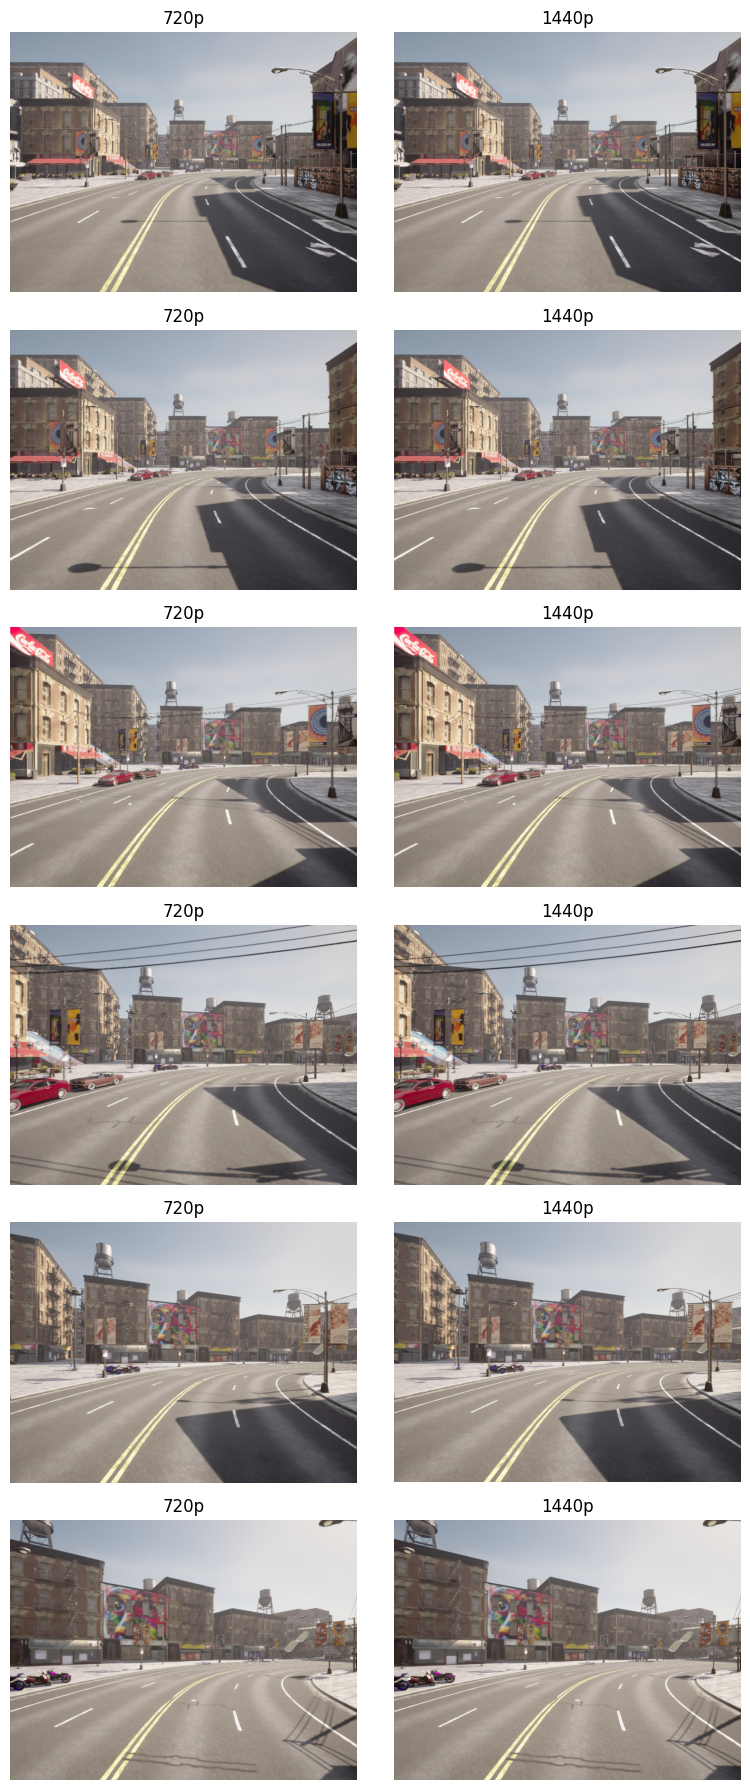

In [9]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Set the path to the dataset directory
base_path = './GameIR-SR_sample/static_town08/00'

# Define the lr, hr images and their corresponding directories
resolution = ['720p', '1440p']

# Set up the plot
max_images = 0
for res in resolution:
    res_path = os.path.join(base_path, res)
    num_images = len([name for name in os.listdir(res_path) if name.endswith('rgb.png')])
    if num_images > max_images:
        max_images = num_images
fig, axs = plt.subplots(max_images, len(resolution), figsize=(8, max_images * 3)) 

# Loop through each resolution and load the images
for i, res in enumerate(resolution):
    res_path = os.path.join(base_path, res)
    image_files = sorted([img for img in os.listdir(res_path) if img.endswith('rgb.png')])
    for j, img_name in enumerate(image_files):
        img_name = image_files[j]
        img_path = os.path.join(res_path, img_name)
        img = Image.open(img_path)
        ax = axs[j, i] if max_images > 1 else axs[i]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"{res}")

plt.tight_layout()
plt.show()

## previews of images (rgb, segmentation map, depth map)

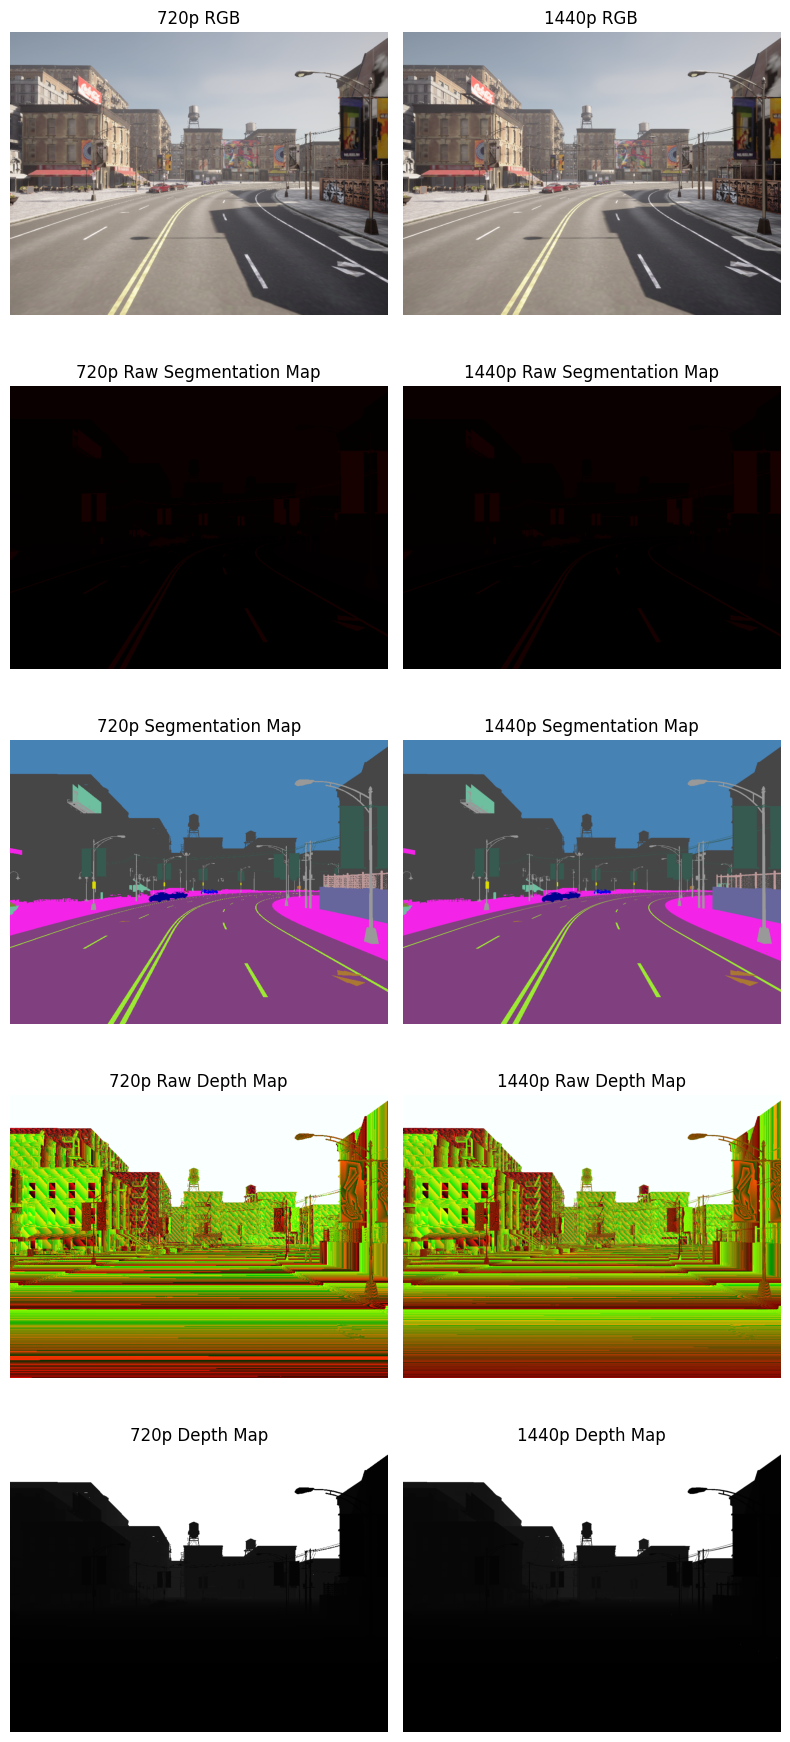

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils import get_segmentation_map, get_depth_map

# Set the path to the dataset directory
base_path = './GameIR-SR_sample/static_town08/00'

# Define the resolutions and their corresponding directories
resolution = ['720p', '1440p']

# Set up the plot with enough subplots
fig, axs = plt.subplots(5, len(resolution), figsize=(8, max_images * 3))  # 5 rows for rgb, raw seg map, seg map, raw depth map and depth map

# Loop through each resolution and load the first image for rgb, seg, and depth
for i, res in enumerate(resolution):
    view_path = os.path.join(base_path, res)
    
    rgb_files = sorted([img for img in os.listdir(view_path) if img.endswith('rgb.png')])
    seg_files = sorted([img for img in os.listdir(view_path) if img.endswith('seg.png')])
    depth_files = sorted([img for img in os.listdir(view_path) if img.endswith('depth.png')])
    
    img_rgb = Image.open(os.path.join(view_path, rgb_files[0]))
    axs[0, i].imshow(img_rgb)
    axs[0, i].axis('off')
    axs[0, i].set_title(f"{res} RGB")
    
    img_raw_seg = Image.open(os.path.join(view_path, seg_files[0]))
    axs[1, i].imshow(img_raw_seg)
    axs[1, i].axis('off')
    axs[1, i].set_title(f"{res} Raw Segmentation Map")

    img_seg = get_segmentation_map(np.array(img_raw_seg), colorize=True)
    axs[2, i].imshow(img_seg)
    axs[2, i].axis('off')
    axs[2, i].set_title(f"{res} Segmentation Map")
    
    img_raw_depth = Image.open(os.path.join(view_path, depth_files[0]))
    axs[3, i].imshow(img_raw_depth)
    axs[3, i].axis('off')
    axs[3, i].set_title(f"{res} Raw Depth Map")

    img_depth = get_depth_map(np.array(img_raw_depth))
    axs[4, i].imshow(img_depth, cmap='gray')
    axs[4, i].axis('off')
    axs[4, i].set_title(f"{res} Depth Map")

plt.tight_layout()
plt.show()
